# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Изучим общую информацию

Для начала необходимо провести первичный осмотр данных: из каких столбцов состоит датафрейм, какие столбцы числовые, булевые и текстовые. Уже по первым пяти строкам мы видим, где присутствуют пропущенные значения, а где их очень много. Оценим типы столбцов и заполним пропуски медианными значениями. Далее построить гистограммы и оценить - каким зависимостям подчиняются числовые столбцы. Практически все гистрограммы похожи на распредление Пуассона, либо пик или концентрация данных "прижаты" к левой части графиков. Поэтому пропущенные значения актуальнее заполнить медианными значениями.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np

pd.set_option('display.max_columns', None)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,14,5150000.0,47.0,2018-08-06T00:00:00,2,2.75,9.0,28.1,9,False,False,False,7.0,2.0,Санкт-Петербург,10142.0,13743.0,2.0,751.0,1.0,881.0,34.0
96,20,8780000.0,78.3,2018-08-24T00:00:00,3,2.50,15.0,51.0,9,NaN,False,False,11.0,NaN,Санкт-Петербург,52108.0,16333.0,0.0,NaN,1.0,746.0,31.0
97,15,4898000.0,146.0,2019-02-12T00:00:00,4,NaN,2.0,77.0,2,NaN,False,False,13.0,NaN,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,34.0
98,11,11700000.0,80.0,2014-12-10T00:00:00,3,NaN,5.0,55.1,3,NaN,False,False,11.0,0.0,Санкт-Петербург,11248.0,8767.0,1.0,666.0,0.0,NaN,831.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

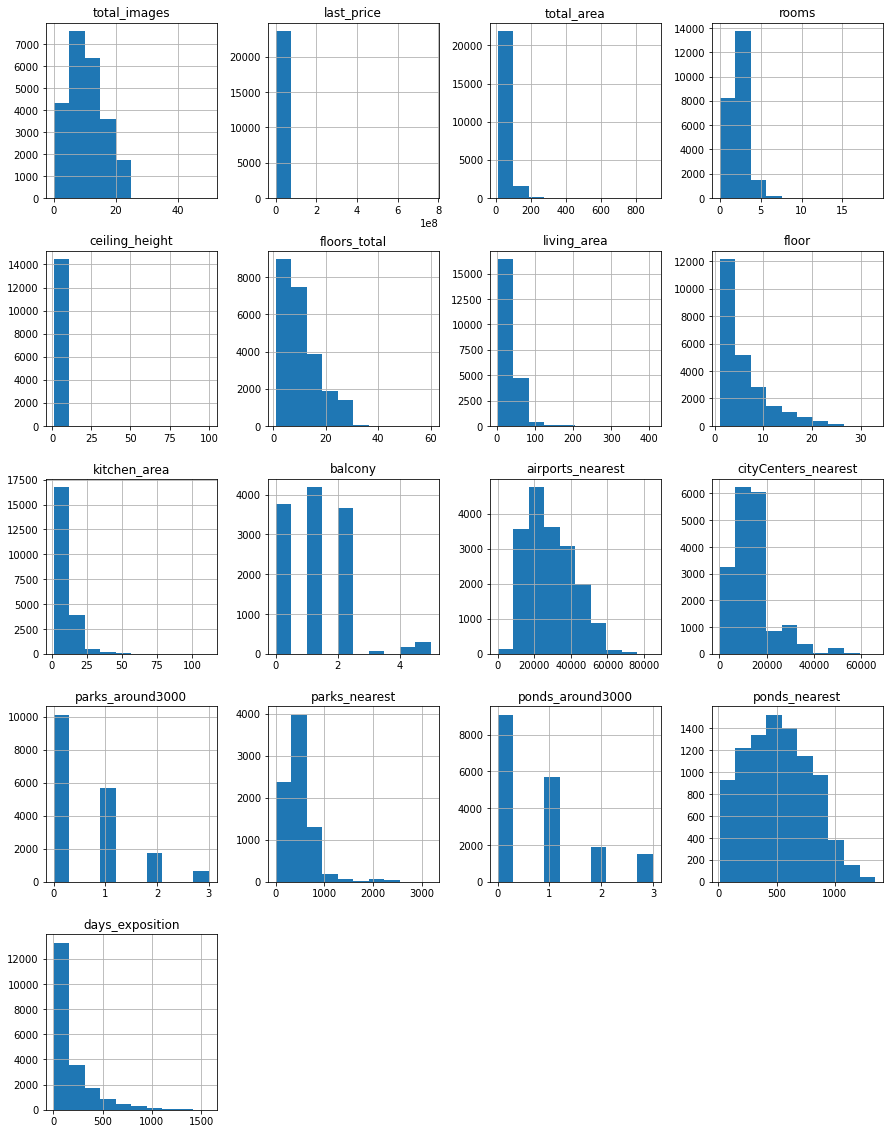

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(df.head(100));
print(df.info());
df.hist(figsize=(15, 20))


### Предобработка данных

In [3]:
df.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

Пропуски имеются в столбцах: 'is_apartment', 'parks_nearest', 'ponds_nearest', 'balcony', 'ceiling_height', 'airports_nearest', 'cityCenters_nearest', 'ponds_around3000', 'parks_around3000', 'days_exposition', 'kitchen_area', 'living_area', 'floors_total', 'locality_name'. Заполним эти пропуски необходимыми значениями на следующем шаге:

In [4]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

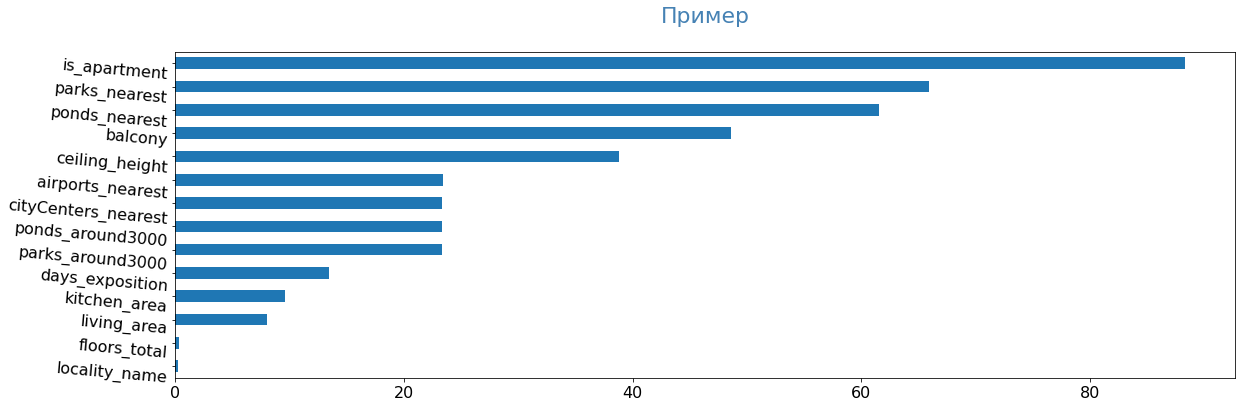

In [5]:
pass_value_barh(df)

#### Найдем и изучим пропущенные значения в столбцах
Для этого заполним пропущенные значения там, где это возможно.

В случае с 'parks_nearest' и 'ponds_nearest' значения Nan можно объяснить соседними столбцами: значения в 'parks_around3000', 'ponds_around3000' равны нулю. Это означает, что парков и прудов в радиусе 3х километров нет. Из этого следует, что парков рядом и прудов рядом, соответственно, также нет, и из этого вытекает значение Nan, поэтому заполнить их следует '-1'. Значение '-1' не учитывается при построении гистограмм.

Пропуски в 'parks_around3000' и 'ponds_around3000' мы не можем заполнить на '0', т.к. мы точно не знаем - действительно ли нет парков и прудов в радиусе 3000 м или эти данные не были внесены по какой-то другой причине.

Значения Nan в столбце 'balcony' также означает, что балконов, скорее всего, в квартире нет, их можно заменить на '-1'.

'ceiling_height', 'airports_nearest', 'cityCenters_nearest', 'days_exposition', 'kitchen_area', 'living_area' заменим на медианные значения. Графики несколько "скошены" в левую часть и похожи на распределение Пуассона или экспоненциальное распределение, поэтому заполним пропуски медианными значениями. Медиана позволяет избавиться от выбросов в данных. Среднее слишком сильно "уведет" нас от более реального показателя, а медианное отсортирует значения по возрастанию и выберет значение по середине.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,property_class
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,-1.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,бизнес-класс
1,7,3350000.0,40.4,2018-12-04,1,2.55,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,-1.0,0.0,-1.0,81.0,эконом
2,10,5196000.0,56.0,2015-08-20,2,2.70,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,комфорт
3,0,64900000.0,159.0,2015-07-24,3,3.00,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,бизнес-класс
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,-1.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,комфорт


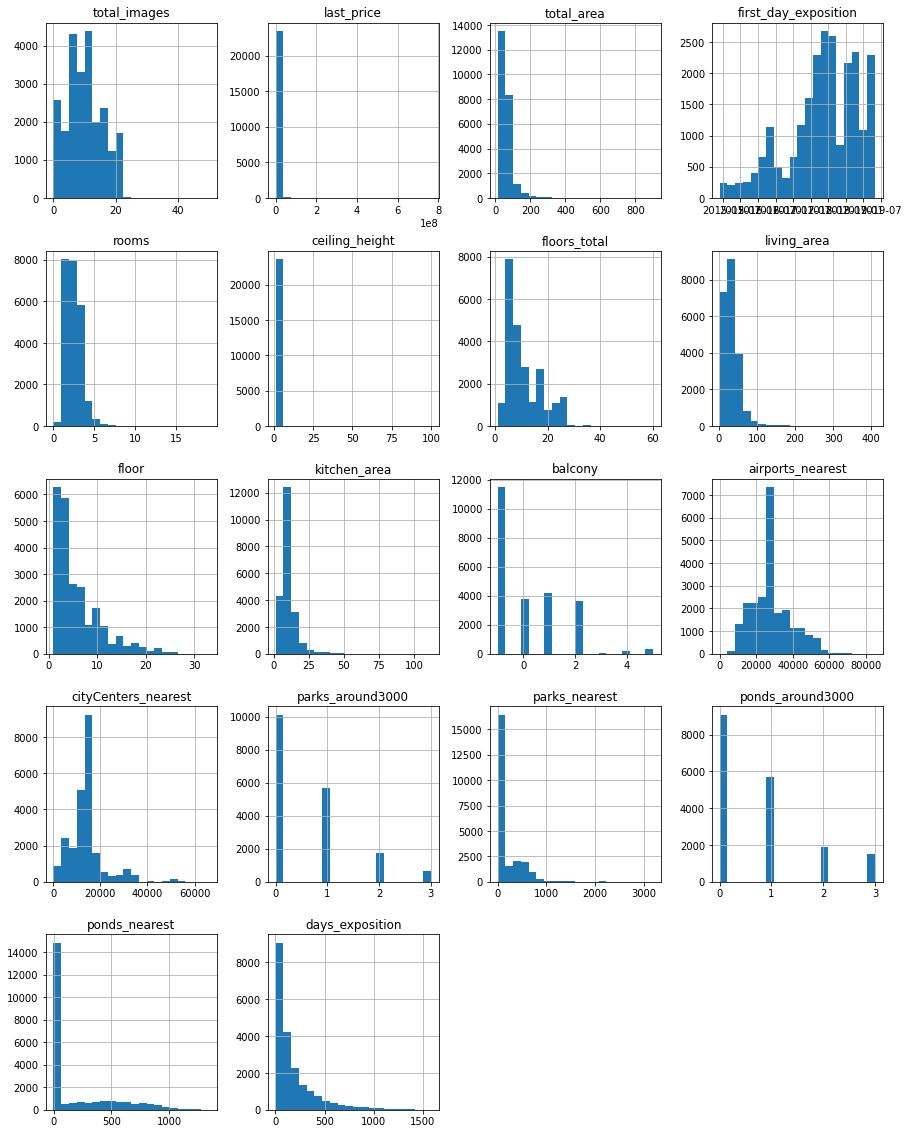

In [6]:
#pd.set_option('display.max_rows', None)

name_median = ['ceiling_height', 'airports_nearest', 'cityCenters_nearest', 'floors_total']
name_flag = ['parks_nearest', 'ponds_nearest', 'balcony']

#создаем функцию, которая разделить недвижимость на классы, чтобы на следующем шаге заполнить пропуски медианными значениями
#более "естественно", чтобы максимально сохранить истинное распределение

def property_class (price):
    if price <= 4500000:
        return 'эконом'
    if 4500001 <= price <= 12000000:
        return 'комфорт'
    return 'бизнес-класс'

df['property_class'] = df['last_price'].apply(property_class)
for n in name_median:
    for t in df['property_class'].unique():
        df.loc[(df['property_class'] == t) & (df[str(n)].isna()), str(n)] = \
        df.loc[(df['property_class'] == t), str(n)].median()

for t in name_flag:
    df.loc[df[str(t)].isna(), str(t)] = -1
    

#Преобразуем дату
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')
display(df.head())

df.hist(figsize=(15, 20), bins=20);
      

***Выводы***

Итак, первичный анализ проведен. Пропуски, по возможности, заполнены. Для 'ceiling_height', 'airports_nearest', 'cityCenters_nearest', 'days_exposition', 'kitchen_area', 'living_area', 'floors_total' пропуски были заполнены медианными значениями, для 'parks_nearest', 'ponds_nearest', 'balcony' пропуски были заполнены '-1'.

Также были построены гистограммы для каждого числового столбца и описаны типы зависимости. В основном это распределения Пуассона с пиками около 0.

#### Рассмотрим типы данных в каждом столбце:
В некоторых числовых данных замечено, что присвоен не совсем корректный тип данных. Для таких столбцов, как:
- `'balcony'` (кол-во балконов),
- `'last_price'` (последняя цена),
- `'floors_total'` (кол-во этажей),
- `'airports_nearest'` (расст. до ближайшего аэропорта),
- `'cityCenters_nearest'` (расст. до центра города),
- `'parks_nearest'` (расстояние до ближайшего парка),
- `'ponds_nearest'` ( расстояние до ближайшего водоёма);

    используется тип `'float'`, когда можно и нужно использовать тип `'int'`.

Кол-во балконов (`balcony`), этажей (`floors_total`) физически не может быть дробным, поэтому использование типа `'float'` тут просто не логично.

In [7]:
float_to_int = ['last_price', 'floors_total', 'balcony', 'airports_nearest', 'cityCenters_nearest',
                'parks_nearest', 'ponds_nearest']

for el in float_to_int:
    df[str(el)] = df[str(el)].astype(int)
display(df.isna().sum().sort_values(ascending=False))
display(df.head())

is_apartment            20924
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
locality_name              49
total_images                0
balcony                     0
ponds_nearest               0
parks_nearest               0
cityCenters_nearest         0
airports_nearest            0
open_plan                   0
last_price                  0
studio                      0
floor                       0
floors_total                0
ceiling_height              0
rooms                       0
first_day_exposition        0
total_area                  0
property_class              0
dtype: int64

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,property_class
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,False,False,25.0,-1,Санкт-Петербург,18863,16028,1.0,482,2.0,755,NaN,бизнес-класс
1,7,3350000,40.4,2018-12-04,1,2.55,11,18.6,1,NaN,False,False,11.0,2,посёлок Шушары,12817,18603,0.0,-1,0.0,-1,81.0,эконом
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,NaN,False,False,8.3,0,Санкт-Петербург,21741,13933,1.0,90,2.0,574,558.0,комфорт
3,0,64900000,159.0,2015-07-24,3,3.00,14,NaN,9,NaN,False,False,NaN,0,Санкт-Петербург,28098,6800,2.0,84,3.0,234,424.0,бизнес-класс
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,False,False,41.0,-1,Санкт-Петербург,31856,8098,2.0,112,1.0,48,121.0,комфорт


**Вывод:**
Кол-во балконов (balcony), этажей (floors_total), дней размещения (days_exposition) физически не может быть дробным, поэтому использование типа 'float' тут просто не логично. Для 'days_exposition' дробная часть несет малую смысловую нагрузку: что нам даст знание 10.02 дня или 33.2 дня? Проще округлить значение этого столбца до целого.

В случае last_price, airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest - цены или расстояния, дробная часть - это очень малое значение по сравнению с целой частью, поэтому ей спокойно можно принебречь.


#### Изучим уникальные значения в столбце с названиями и устраните неявные дубликаты. 

В данных были замечены разные названия одних и тех же населенных пунктов. Приведём их к однообразию:

In [8]:
df['locality_name'] = df['locality_name'].str.replace('поселок', 'посёлок')
df['locality_name'] = df['locality_name'].str.replace('посёлок Рябово', 'посёлок городского типа Рябово')
df['locality_name'] = df['locality_name'].str.replace('городской посёлок', 'посёлок городского типа')
df['locality_name'] = df['locality_name'].str.replace('садовое товарищество', 'садоводческое некоммерческое товарищество')

print(df['locality_name'].str.lower().sort_values().unique())

['бокситогорск' 'волосово' 'волхов' 'всеволожск' 'выборг' 'высоцк'
 'гатчина' 'деревня агалатово' 'деревня аро' 'деревня батово'
 'деревня бегуницы' 'деревня белогорка' 'деревня большая вруда'
 'деревня большая пустомержа' 'деревня большие колпаны'
 'деревня большое рейзино' 'деревня большой сабск' 'деревня бор'
 'деревня борисова грива' 'деревня ваганово' 'деревня вартемяги'
 'деревня вахнова кара' 'деревня выскатка' 'деревня гарболово'
 'деревня глинка' 'деревня горбунки' 'деревня гостилицы'
 'деревня заклинье' 'деревня заневка' 'деревня зимитицы' 'деревня извара'
 'деревня иссад' 'деревня калитино' 'деревня кальтино' 'деревня камышовка'
 'деревня каськово' 'деревня келози' 'деревня кипень' 'деревня кисельня'
 'деревня колтуши' 'деревня коркино' 'деревня котлы' 'деревня кривко'
 'деревня кудрово' 'деревня кузьмолово' 'деревня курковицы'
 'деревня куровицы' 'деревня куттузи' 'деревня лаврики' 'деревня лаголово'
 'деревня лампово' 'деревня лесколово' 'деревня лопухинка'
 'деревня луппо

In [9]:
# check
df['locality_name'].nunique()

322

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />хорошая работа по избавлению от неявных дубликатов

#### Найдем и устраним редкие и выбивающиеся значения. 

В случае со столбцом 'ceiling_height' было замечено, что имеются аномально большие значения высоты потолков. Можно предположить, что при заполнении таблицы ошибочно поставили плавающую запятую не в том месте. Отсортировав уникальные значения высоты потолков от большего к меньшему, можно отсечь значения от 20 м, значение ниже равно 14 м, что при делении на 10 приведёт к 1.4 м. Высота потолков в 1.4 м подойдёт далеко не каждой семье, если только это не семья из карликов. Поэтому сделаем отсечку на ошибки от 20 м. Если посмотреть в конец списка, то можно заметить высоту потолков от 1.75 до 1 метра, что очень странно и подозрительно... Но, пожалуй, оставим эти строки в датасете до консультации с руководством или инженерами, ответственными за выгрузку данных.


In [10]:
print('Уменьшим высоту потолков больше 14 м в 10 раз:')
df['ceiling_height'] = df['ceiling_height'].where(df['ceiling_height'] <= 14, df['ceiling_height'] / 10)
print('Высота потолков теперь:')
display(df['ceiling_height'].sort_values(ascending=False).unique())

Уменьшим высоту потолков больше 14 м в 10 раз:
Высота потолков теперь:


array([14.  , 10.3 , 10.  ,  8.3 ,  8.  ,  6.  ,  5.8 ,  5.6 ,  5.5 ,
        5.3 ,  5.2 ,  5.  ,  4.9 ,  4.8 ,  4.7 ,  4.65,  4.5 ,  4.45,
        4.4 ,  4.37,  4.3 ,  4.25,  4.2 ,  4.19,  4.15,  4.14,  4.1 ,
        4.06,  4.  ,  3.98,  3.95,  3.93,  3.9 ,  3.88,  3.87,  3.86,
        3.85,  3.84,  3.83,  3.82,  3.8 ,  3.78,  3.76,  3.75,  3.7 ,
        3.69,  3.68,  3.67,  3.66,  3.65,  3.63,  3.62,  3.6 ,  3.59,
        3.58,  3.57,  3.56,  3.55,  3.54,  3.53,  3.52,  3.51,  3.5 ,
        3.49,  3.48,  3.47,  3.46,  3.45,  3.44,  3.43,  3.42,  3.4 ,
        3.39,  3.38,  3.37,  3.36,  3.35,  3.34,  3.33,  3.32,  3.31,
        3.3 ,  3.29,  3.28,  3.27,  3.26,  3.25,  3.24,  3.23,  3.22,
        3.21,  3.2 ,  3.18,  3.17,  3.16,  3.15,  3.14,  3.13,  3.12,
        3.11,  3.1 ,  3.09,  3.08,  3.07,  3.06,  3.05,  3.04,  3.03,
        3.02,  3.01,  3.  ,  2.99,  2.98,  2.97,  2.96,  2.95,  2.94,
        2.93,  2.92,  2.91,  2.9 ,  2.89,  2.88,  2.87,  2.86,  2.85,
        2.84,  2.83,

#### Рассмотрим значения параметров объектов недвижимости на разных квантилях

In [11]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    df[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.01, .5, .90, .9976])  
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.01,1.00,25.20,2.50,4.00,"1,000,000.00",13.00,5.00,1.00,2.00
0.5,2.00,52.00,2.64,95.00,"4,650,000.00",30.00,9.10,4.00,9.00
0.9,3.00,93.52,3.00,460.00,"10,914,231.20",55.00,15.90,13.00,22.00
0.9976,7.00,309.74,4.00,"1,311.28","82,000,000.00",181.25,50.00,25.00,27.00


#### Устраним аномалии и редкости в колонках: 
        
        'rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floors_total'

In [12]:
# check
df.rooms.value_counts().to_frame()

,rooms
1,8047
2,7940
3,5814
4,1180
5,326
0,197
6,105
7,59
8,12
9,8


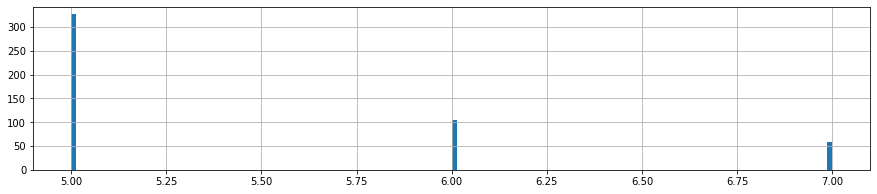

In [13]:
# check
df.rooms.hist(bins = 150, figsize = (15,3), range = (5,7));

In [14]:
# check
df.rooms.value_counts().sort_values(ascending=False).to_frame()

,rooms
1,8047
2,7940
3,5814
4,1180
5,326
0,197
6,105
7,59
8,12
9,8


**Вывод**  
Квартиры с 7 и более комнатами являются редкостью, поэтому смело можем удалить их из датафрейма.

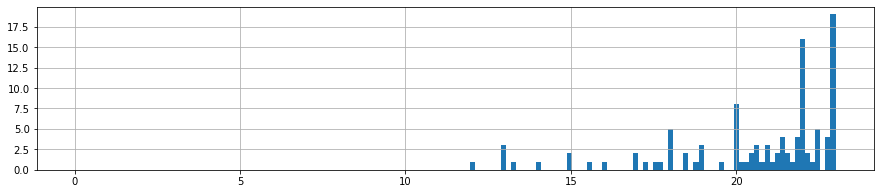

In [15]:
# check
df.total_area.hist(bins = 150, figsize = (15,3), range = (0,23));

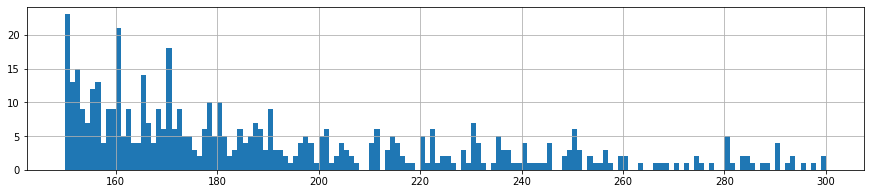

In [16]:
# check
df.total_area.hist(bins = 150, figsize = (15,3), range = (150,300));

Можем убрать редкие значения из датафрейма с значением 'total_area' > 250 и 'total_area' < 22.

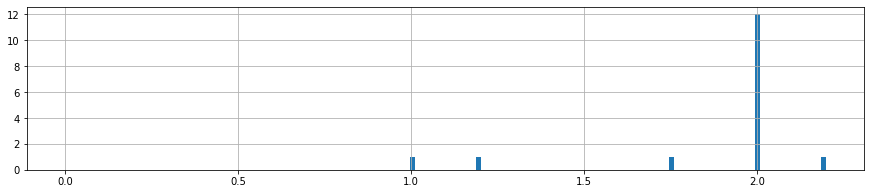

In [17]:
# check
df.ceiling_height.hist(bins = 150, figsize = (15,3), range = (0,2.2));

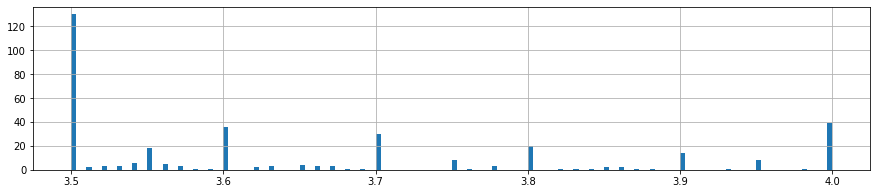

In [18]:
# check
df.ceiling_height.hist(bins = 150, figsize = (15,3), range = (3.5, 4));

Можем убрать редкие значения из датафрейма с значением 'ceiling_height' > 3.6 и 'ceiling_height' < 2.2.

In [19]:
df.days_exposition.describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

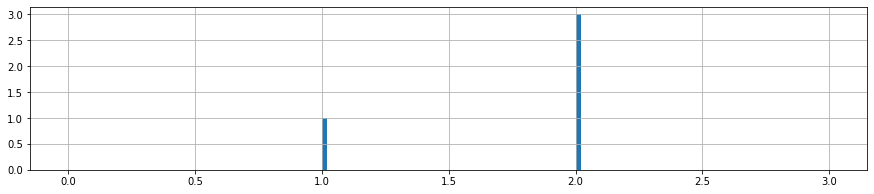

In [20]:
# check
df.days_exposition.hist(bins = 150, figsize = (15,3), range = (0, 3));

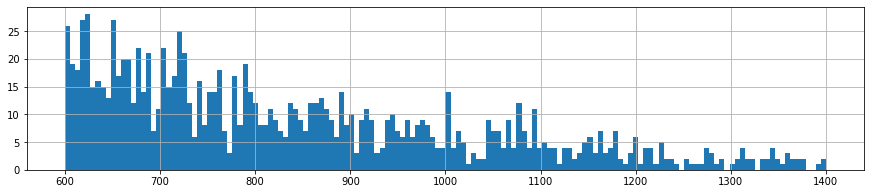

In [21]:
# check
df.days_exposition.hist(bins = 150, figsize = (15,3), range = (600, 1400));

Можем убрать редкие значения из датафрейма с значением 'days_exposition' > 1000

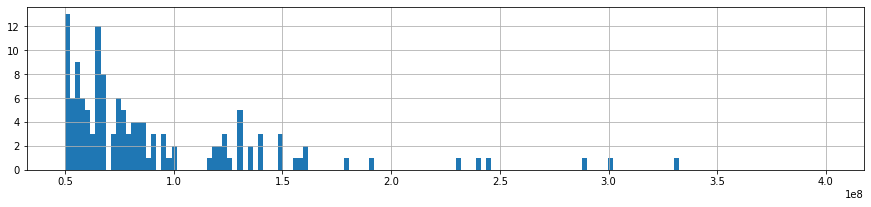

In [22]:
# check
df.last_price.hist(bins = 150, figsize = (15,3), range = (50000000,400000000));

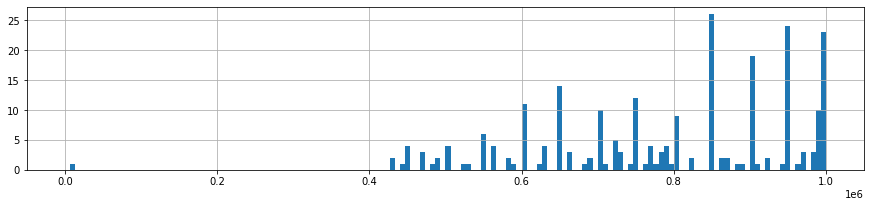

In [23]:
# check
df.last_price.hist(bins = 150, figsize = (15,3), range = (0,1000000));

Можем убрать редкие значения из датафрейма с значением 'last_price' > 100 000 000 и 'last_price' < 600 000.

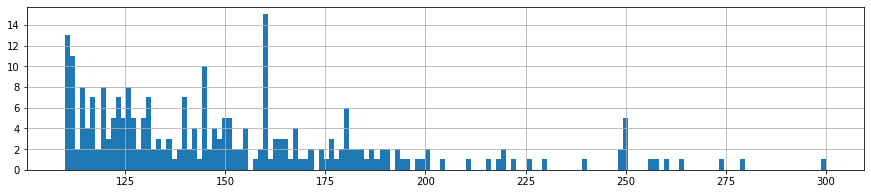

In [24]:
# check
df.living_area.hist(bins = 150, figsize = (15,3), range = (110,300));

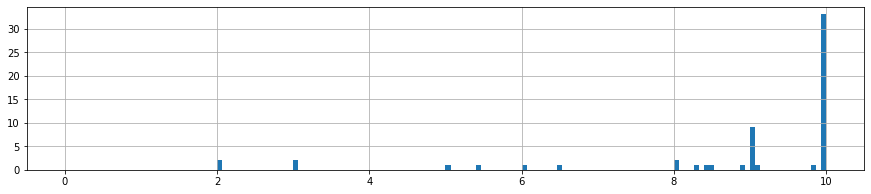

In [25]:
# check
df.living_area.hist(bins = 150, figsize = (15,3), range = (0, 10));

Можем убрать редкие значения из датафрейма с значением 'living_area' > 113 и 'living_area' < 9.9.

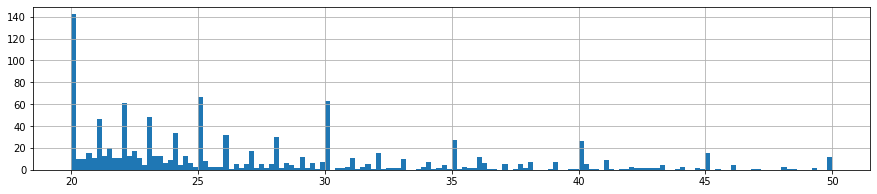

In [26]:
# check
df.kitchen_area.hist(bins = 150, figsize = (15,3), range = (20,50));

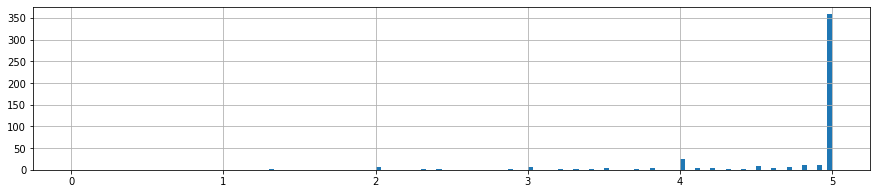

In [27]:
# check
df.kitchen_area.hist(bins = 150, figsize = (15,3), range = (0,5));

Можем убрать редкие значения из датафрейма с значением 'kitchen_area' > 41 и 'kitchen_area' < 4.9.

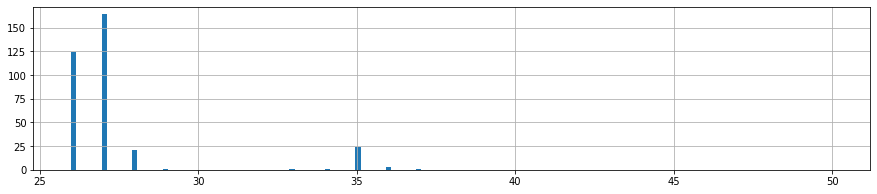

In [28]:
# check
df.floors_total.hist(bins = 150, figsize = (15,3), range = (26,50));


Можем убрать редкие значения из датафрейма с значением 'floors_total' > 27

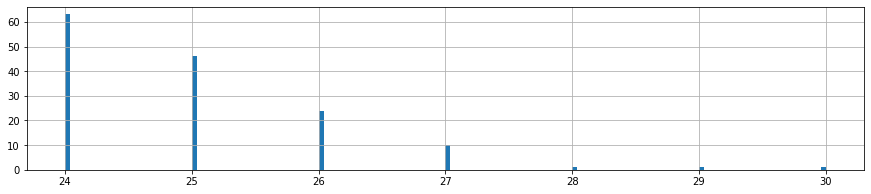

In [29]:
# check
df.floor.hist(bins = 150, figsize = (15,3), range = (24,30));

##### check nan

In [30]:
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [1]:
df = df.query('rooms <= 7 or rooms.isna()', engine='python');
df = df.query('20 < total_area < 250 or total_area.isna()', engine='python');
df = df.query('2.2 < ceiling_height < 3.6  or ceiling_height.isna()', engine='python');
df = df.query('3 <= days_exposition < 1100  or days_exposition.isna()', engine='python');
df = df.query('600000 < last_price < 100000000 or last_price.isna()', engine='python');
df = df.query('9.9 < living_area < 113 or living_area.isna()', engine='python');
df = df.query('4.9 < kitchen_area < 41 or kitchen_area.isna()', engine='python');
df = df.query('floors_total < 28 or floors_total.isna()', engine='python');
df = df.query('total_area*0.9 > living_area + kitchen_area or total_area.isna() or living_area.isna() \
               or kitchen_area.isna()', engine='python');

df.loc[df['floors_total'] < df['floor'], 'floors_total'] = df['floor'] 
#если этаж превышает максимальный, заменяем на максимальный.

display(df.head())


NameError: name 'df' is not defined

Кол-во строк-столбцов после фильтрации:

In [1]:
# check
df.shape

NameError: name 'df' is not defined

In [33]:
x = (23699 - df.shape[0]) / 23699
print('Процент потерь:', round(x, 4)*100, '%')

Процент потерь: 5.91 %


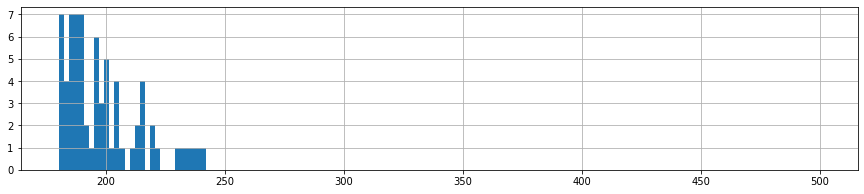

In [34]:
# check
df.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

In [35]:
# check
df.total_area.value_counts().to_frame()

,total_area
45.00,407
42.00,368
31.00,338
44.00,338
60.00,328
...,...
58.34,1
25.15,1
29.61,1
34.64,1


In [36]:
df.total_area.describe()

count    22299.000000
mean        57.476994
std         25.454440
min         20.100000
25%         40.000000
50%         51.200000
75%         68.000000
max        240.000000
Name: total_area, dtype: float64

**Вывод**  
Итак,мы устранили аномалии в `'rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floors_total`

#### Проверка

Проведём проверку после заполнения датасета медианными значениями:

In [37]:
print((df['total_area']*0.9 <= df['living_area'] + df['kitchen_area']).sum())

0


In [38]:
print((df['floors_total'] < df['floor']).sum())

0


In [39]:
print((df['total_area']*0.9 <= df['living_area'] + df['kitchen_area']).sum())

0


In [41]:
print((df['floors_total'] < df['floor']).sum())

0


Проверка по столбцу `'floors_total'` прошла, аномалия исправлена. Максимальный этаж исправили на `'floor'`, который превышал `'floors_total'`.

### Посчитаем и добавим в таблицу новые столбцы

In [42]:
#Добавим столбец: стоимость одного квадратного метра
df['price_square_m'] = round(df['last_price'] / df['total_area']).astype(int)
#Добавим столбец: номер дня недели
df['day_week'] = df['first_day_exposition'].dt.weekday
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year
df['type_floor'] = 'Nan'
df.loc[df['floor'] == 1, 'type_floor'] = 'первый'
df.loc[df['floor'] == df['floors_total'], 'type_floor'] = 'последний'
df.loc[(df['floor'] != 1) & (df['floor'] != df['floors_total']), 'type_floor'] = 'другой'
df['cityCenters_nearest_km'] = round(df['cityCenters_nearest'] / 1000).astype(int)

display(df.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,property_class,price_square_m,day_week,month,year,type_floor,cityCenters_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,NaN,False,False,25.00,-1,Санкт-Петербург,18863,16028,1.0,482,2.0,755,NaN,бизнес-класс,120370,3,3,2019,другой,16
1,7,3350000,40.40,2018-12-04,1,2.55,11,18.60,1,NaN,False,False,11.00,2,посёлок Шушары,12817,18603,0.0,-1,0.0,-1,81.0,эконом,82921,1,12,2018,первый,19
2,10,5196000,56.00,2015-08-20,2,2.70,5,34.30,4,NaN,False,False,8.30,0,Санкт-Петербург,21741,13933,1.0,90,2.0,574,558.0,комфорт,92786,3,8,2015,другой,14
3,0,64900000,159.00,2015-07-24,3,3.00,14,NaN,9,NaN,False,False,NaN,0,Санкт-Петербург,28098,6800,2.0,84,3.0,234,424.0,бизнес-класс,408176,4,7,2015,другой,7
5,10,2890000,30.40,2018-09-10,1,2.55,12,14.40,5,NaN,False,False,9.10,-1,посёлок городского типа Янино-1,26726,15063,NaN,-1,NaN,-1,55.0,эконом,95066,0,9,2018,другой,15
6,6,3700000,37.30,2017-11-02,1,2.55,26,10.60,6,NaN,False,False,14.40,1,посёлок Парголово,52996,19143,0.0,-1,0.0,-1,155.0,эконом,99196,3,11,2017,другой,19
7,5,7915000,71.60,2019-04-18,2,2.70,24,NaN,22,NaN,False,False,18.90,2,Санкт-Петербург,23982,11634,0.0,-1,0.0,-1,NaN,комфорт,110545,3,4,2019,другой,12
8,20,2900000,33.16,2018-05-23,1,2.55,27,15.43,26,NaN,False,False,8.81,-1,посёлок Мурино,26726,15063,NaN,-1,NaN,-1,189.0,эконом,87455,2,5,2018,другой,15
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,NaN,False,False,6.50,2,Санкт-Петербург,50898,15008,0.0,-1,0.0,-1,289.0,комфорт,88525,6,2,2017,другой,15
10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,NaN,False,False,8.50,-1,Санкт-Петербург,38357,13878,1.0,310,2.0,553,137.0,комфорт,127525,3,11,2017,другой,14


***Вывод*** 

Были устранены дубликаты, в `'locality_name'`, добавлены столбцы: `'per_square_meter', 'day_week', 'month', 'year', 'type_floor', cityCenters_nearest_km`. 

### Исследовательский анализ данных

Приступим к исследовательскому анализу:

In [78]:
print('Уникальные значения общей площади квартир с кол-ом комнат, равных нулю:')
display(df[df['rooms'] == 0]['total_area'].sort_values().unique())
print('Первые 20 минимальных значений общей площади датафрейма:')
display(df['total_area'].sort_values(ascending=True).unique()[:20])
micro_total_area = df[df['total_area'] < 20].sort_values(by='total_area')
print('Датафрейм первых 20 минимальных значений общей площади датафрейма:')
display(micro_total_area.head(20))
print('Первые 20 минимальных значений жилой площади датафрейма:')
display(df['living_area'].sort_values(ascending=True).unique()[:20])

#display(df['kitchen_area'].sort_values(ascending=True).unique())


Уникальные значения общей площади квартир с кол-ом комнат, равных нулю:


array([20.5 , 21.  , 21.3 , 21.4 , 22.  , 22.2 , 22.3 , 22.5 , 22.7 ,
       23.  , 23.06, 23.3 , 23.39, 23.4 , 23.5 , 23.6 , 23.7 , 23.8 ,
       23.98, 24.  , 24.05, 24.1 , 24.2 , 24.4 , 24.5 , 24.6 , 24.75,
       24.9 , 25.  , 25.2 , 25.27, 25.3 , 25.4 , 25.41, 25.7 , 25.9 ,
       26.  , 26.05, 26.1 , 26.23, 26.49, 26.7 , 26.8 , 27.  , 27.1 ,
       27.11, 27.3 , 27.32, 27.4 , 27.5 , 27.55, 27.56, 27.6 , 27.7 ,
       27.81, 28.  , 28.01, 28.05, 28.16, 28.2 , 28.3 , 28.4 , 28.5 ,
       28.9 , 29.  , 29.1 , 29.2 , 29.3 , 30.  , 30.1 , 30.3 , 30.5 ,
       31.  , 31.1 , 32.  , 32.03, 32.2 , 32.3 , 32.4 , 32.5 , 32.8 ,
       34.  , 34.4 , 35.  , 38.3 , 42.1 , 42.63, 43.3 , 44.2 , 58.4 ,
       73.6 , 98.4 ])

Первые 20 минимальных значений общей площади датафрейма:


array([20.1 , 20.5 , 20.6 , 20.67, 20.8 , 21.  , 21.1 , 21.3 , 21.4 ,
       21.57, 21.6 , 21.7 , 21.8 , 21.89, 21.9 , 22.  , 22.2 , 22.23,
       22.3 , 22.5 ])

Датафрейм первых 20 минимальных значений общей площади датафрейма:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,property_class,price_square_m,day_week,month,year,type_floor,cityCenters_nearest_km


Первые 20 минимальных значений жилой площади датафрейма:


array([10.  , 10.08, 10.3 , 10.4 , 10.5 , 10.52, 10.55, 10.6 , 10.7 ,
       10.76, 10.8 , 10.9 , 10.93, 10.94, 11.  , 11.1 , 11.15, 11.2 ,
       11.3 , 11.38])

***Выводы***

В столбце 'ceiling_height' были устранены аномально большие значения высоты потолков.

В столбце 'rooms' замечены строки с нулевыми значениями, что является квартирами студиями. Минимальное значение суммарной площади 'total_area' начинается с 15.5 кв.м., а заканчивается на значении 371 кв.м.

В столбце 'living_area' были обнаружены площади в 2, 3, 5, 5.4, 6, 6.5, 8 кв.м., что очень странно. В этих данных могли быть пропущены нули или значения площади уменьшены в 10 раз.  
Ресурс "https://realty.rbc.ru/news/6214d7029a7947af1c18949b " сообщает, что минимальная площадь микроквартир в новостройках Москвы в 2022 году составляет 8.8 кв.м. Этот данные можно экстраполировать и на рынок недвижимости в Санкт-Петербурге.

In [44]:
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22299 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            22299 non-null  int64         
 1   last_price              22299 non-null  int64         
 2   total_area              22299 non-null  float64       
 3   first_day_exposition    22299 non-null  datetime64[ns]
 4   rooms                   22299 non-null  int64         
 5   ceiling_height          22299 non-null  float64       
 6   floors_total            22299 non-null  int64         
 7   living_area             20477 non-null  float64       
 8   floor                   22299 non-null  int64         
 9   is_apartment            2603 non-null   object        
 10  studio                  22299 non-null  bool          
 11  open_plan               22299 non-null  bool          
 12  kitchen_area            20117 non-null  float6

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> тип данных изменен корректно

Проверим, остались ли какие-либо аномалии после предобработки:

In [ ]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

data = df.copy()

(
    df[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

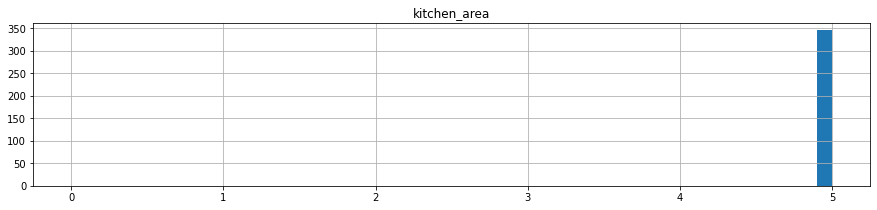

In [46]:
# check
data.hist(column = 'kitchen_area', bins = 50, figsize = (15,3), range = (0,5));

In [47]:
# check
data.rooms.value_counts().to_frame()

,rooms
1,7728
2,7584
3,5483
4,1054
5,219
0,181
6,39
7,11


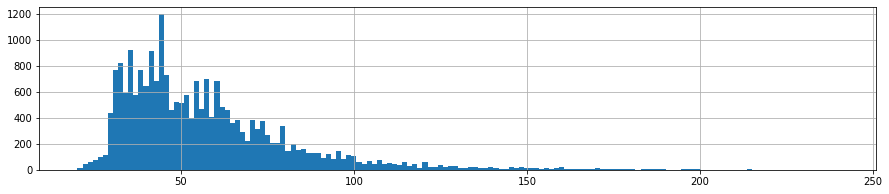

In [48]:
# check
data.total_area.hist(bins = 150, figsize = (15,3));

Все квартиры более 250-ти квадратных метров можно считать редкостями.  
Особенно это заметно на втором графике, где мы подробно рассматриваем промежуток от 180 кв. метров до 500.

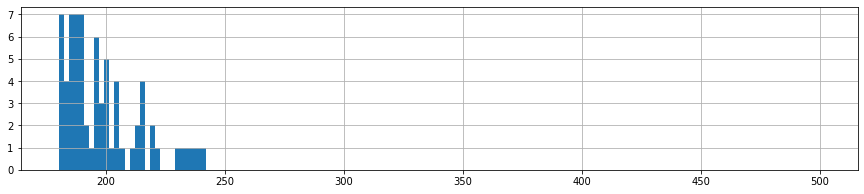

In [49]:
# check
data.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

In [50]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    df[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.01, .5, .90, .9976])  
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.01,1.00,26.00,2.50,4.00,"1,100,000.00",13.10,5.00,1.00,2.00
0.5,2.00,51.20,2.60,93.00,"4,595,000.00",30.00,9.00,4.00,9.00
0.9,3.00,89.00,3.00,438.60,"9,990,000.00",52.23,15.00,13.00,22.00
0.9976,5.00,186.00,3.50,"1,059.55","45,178,720.00",104.09,36.30,25.00,27.00


Среднее:


32.539870171997855

Медиана:


30.0

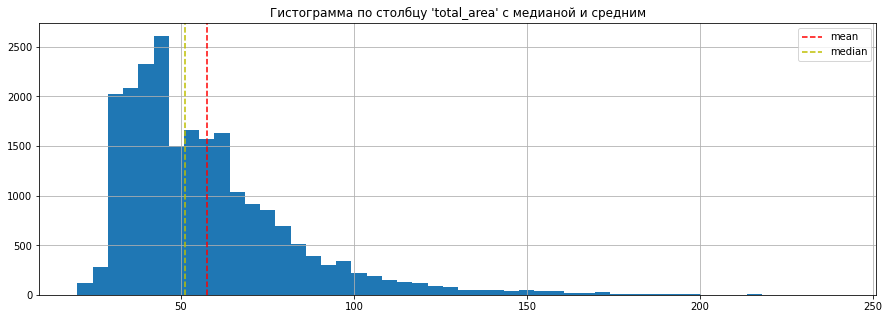

In [52]:
print('Среднее:')
display(df['living_area'].mean())
print('Медиана:')
display(df['living_area'].median())

plt.figure(figsize = (15,5))

ax = df['total_area'].hist(bins = 50)

ax.axvline(x = df['total_area'].mean(), color = 'r', linestyle = 'dashed', label = 'mean')
ax.axvline(x = df['total_area'].median(), color = 'y', linestyle = 'dashed', label = 'median')
plt.legend()
plt.title("Гистограмма по столбцу 'total_area' с медианой и средним")
plt.show()

Распределение `'total_area'` похоже на распределение Пуассона, скошенное вправо, с медианой 30.

Среднее:


32.539870171997855

Медиана:


30.0

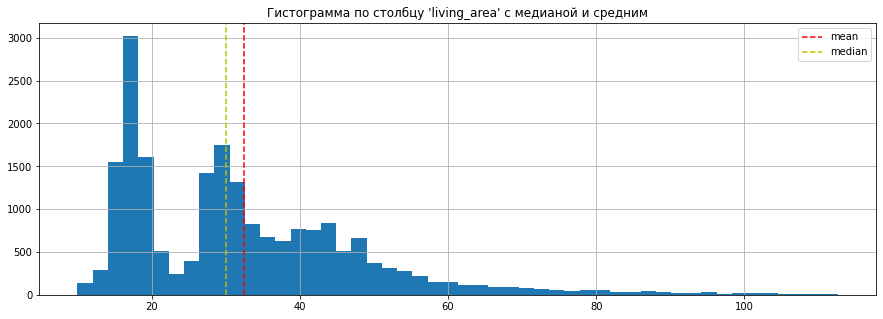

In [53]:
print('Среднее:')
display(df['living_area'].mean())
print('Медиана:')
display(df['living_area'].median())

plt.figure(figsize = (15,5))

ax = df['living_area'].hist(bins = 50)

ax.axvline(x = df['living_area'].mean(), color = 'r', linestyle = 'dashed', label = 'mean')
ax.axvline(x = df['living_area'].median(), color = 'y', linestyle = 'dashed', label = 'median')
plt.legend()
plt.title("Гистограмма по столбцу 'living_area' с медианой и средним")
plt.show()

Распределение `'living_area'` похоже на распределение Пуассона, скошенное вправо, с двумя пиками у 18 и второй меньший пик на значении среднего 32.53.

Среднее:


10.11281900879853

Медиана:


9.0

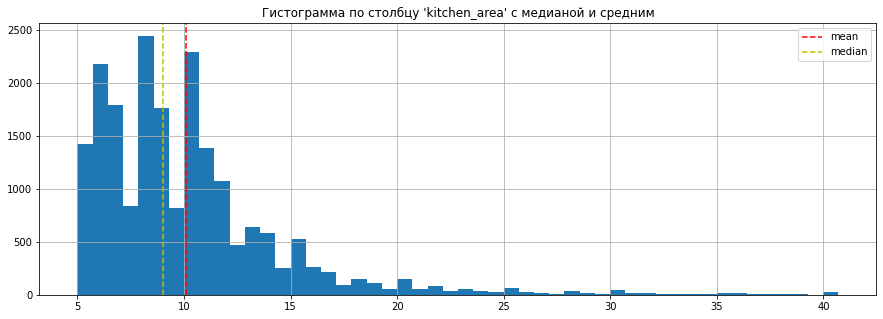

In [54]:
print('Среднее:')
display(df['kitchen_area'].mean())
print('Медиана:')
display(df['kitchen_area'].median())

plt.figure(figsize = (15,5))

ax = df['kitchen_area'].hist(bins = 50)

ax.axvline(x = df['kitchen_area'].mean(), color = 'r', linestyle = 'dashed', label = 'mean')
ax.axvline(x = df['kitchen_area'].median(), color = 'y', linestyle = 'dashed', label = 'median')
plt.legend()
plt.title("Гистограмма по столбцу 'kitchen_area' с медианой и средним")
plt.show()

Распределение `'kitchen_area'` похоже на распределение Пуассона, скошенное вправо, с медианой 9.

Среднее:


5830071.448674829

Медиана:


4595000.0

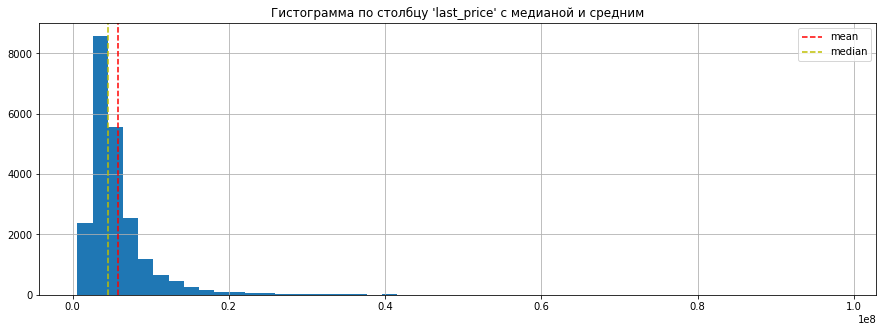

In [55]:
print('Среднее:')
display(df['last_price'].mean())
print('Медиана:')
display(df['last_price'].median())

plt.figure(figsize = (15,5))

ax = df['last_price'].hist(bins = 50)

ax.axvline(x = df['last_price'].mean(), color = 'r', linestyle = 'dashed', label = 'mean')
ax.axvline(x = df['last_price'].median(), color = 'y', linestyle = 'dashed', label = 'median')
plt.legend()
plt.title("Гистограмма по столбцу 'last_price' с медианой и средним")
plt.show()

Распределение `'last_price'` похоже на распределение Пуассона, скошенное вправо, с медианой 4595000.

Среднее:


2.0165478272568276

Медиана:


2.0

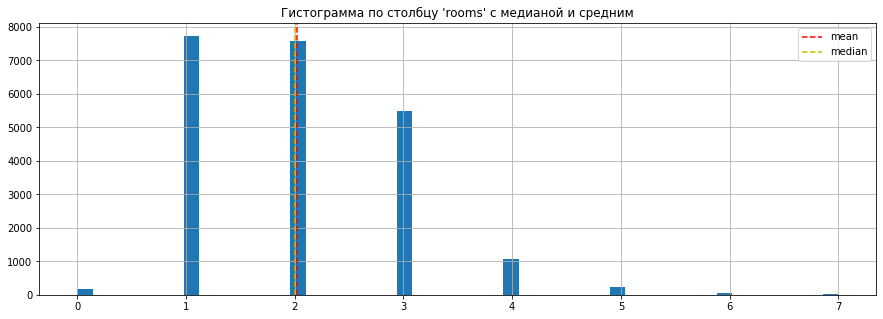

In [56]:
print('Среднее:')
display(df['rooms'].mean())
print('Медиана:')
display(df['rooms'].median())

plt.figure(figsize = (15,5))

ax = df['rooms'].hist(bins = 50)

ax.axvline(x = df['rooms'].mean(), color = 'r', linestyle = 'dashed', label = 'mean')
ax.axvline(x = df['rooms'].median(), color = 'y', linestyle = 'dashed', label = 'median')
plt.legend()
plt.title("Гистограмма по столбцу 'rooms' с медианой и средним")
plt.show()

Распределение `'rooms'` похоже на распределение Пуассона, скошенное вправо, с максимумом 1 и 2 ком.кв.

Среднее:


2.673918561370465

Медиана:


2.6

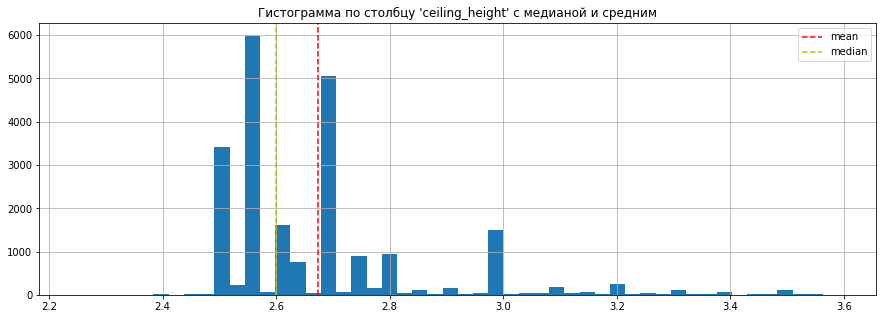

In [57]:
print('Среднее:')
display(df['ceiling_height'].mean())
print('Медиана:')
display(df['ceiling_height'].median())

plt.figure(figsize = (15,5))

ax = df['ceiling_height'].hist(bins = 50)

ax.axvline(x = df['ceiling_height'].mean(), color = 'r', linestyle = 'dashed', label = 'mean')
ax.axvline(x = df['ceiling_height'].median(), color = 'y', linestyle = 'dashed', label = 'median')
plt.legend()
plt.title("Гистограмма по столбцу 'ceiling_height' с медианой и средним")
plt.show()

Распределение `'ceiling_height'` похоже на распределение Пуассона, скошенное вправо, с максимумом в 2.58 м и медианой 2.6 м.

Среднее:


5.930355621328311

Медиана:


4.0

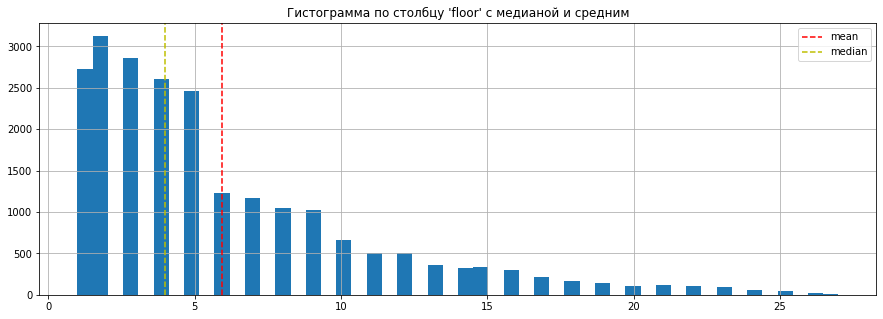

In [58]:
print('Среднее:')
display(df['floor'].mean())
print('Медиана:')
display(df['floor'].median())


plt.figure(figsize = (15,5))

ax = df['floor'].hist(bins = 50)

ax.axvline(x = df['floor'].mean(), color = 'r', linestyle = 'dashed', label = 'mean')
ax.axvline(x = df['floor'].median(), color = 'y', linestyle = 'dashed', label = 'median')
plt.legend()
plt.title("Гистограмма по столбцу 'floor' с медианой и средним")
plt.show()

Распределение `'floor'` похоже на распределение Пуассона, скошенное вправо,  с максимумом 2 этаж и медианой 4 этаж.

In [2]:
df.pivot_table(index='type_floor', values='last_price', aggfunc='count').plot.barh();

NameError: name 'df' is not defined

In [60]:
# check
df.pivot_table(index='type_floor', values='last_price', aggfunc='count')

,last_price
type_floor,
другой,16499
первый,2703
последний,3097


При построении `'type_floor'` значение колонки '`другой этаж'` наибольшее, на втором месте `'последний этаж'`.

Среднее:


10.786941118435804

Медиана:


9.0

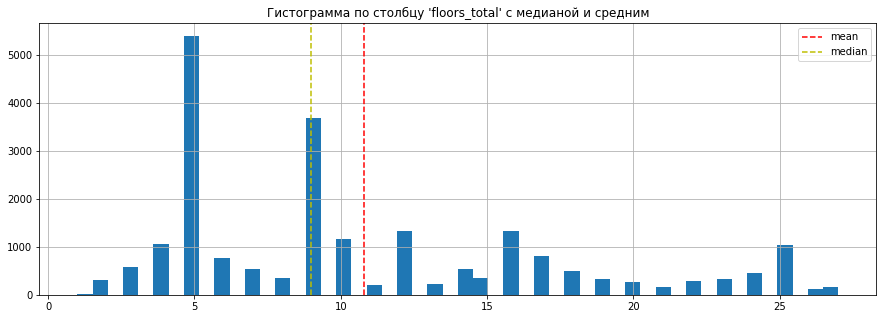

In [61]:
print('Среднее:')
display(df['floors_total'].mean())
print('Медиана:')
display(df['floors_total'].median())


plt.figure(figsize = (15,5))

ax = df['floors_total'].hist(bins = 50)

ax.axvline(x = df['floors_total'].mean(), color = 'r', linestyle = 'dashed', label = 'mean')
ax.axvline(x = df['floors_total'].median(), color = 'y', linestyle = 'dashed', label = 'median')
plt.legend()
plt.title("Гистограмма по столбцу 'floors_total' с медианой и средним")
plt.show()

Распределение `'floors_total'` скошенно вправо. Имеет два ярко выраженных пика: 5 и 9 этажи. Медиана также равна 9.

Среднее:


14505.90376250056

Медиана:


14693.0

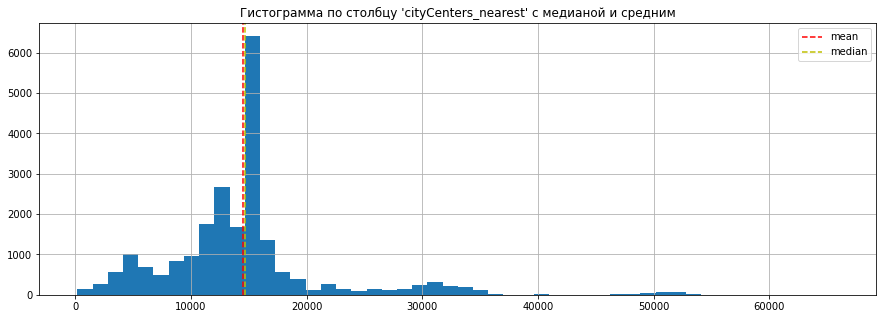

In [62]:
print('Среднее:')
display(df['cityCenters_nearest'].mean())
print('Медиана:')
display(df['cityCenters_nearest'].median())


plt.figure(figsize = (15,5))

ax = df['cityCenters_nearest'].hist(bins = 50)

ax.axvline(x = df['cityCenters_nearest'].mean(), color = 'r', linestyle = 'dashed', label = 'mean')
ax.axvline(x = df['cityCenters_nearest'].median(), color = 'y', linestyle = 'dashed', label = 'median')
plt.legend()
plt.title("Гистограмма по столбцу 'cityCenters_nearest' с медианой и средним")
plt.show()

Распределение `'cityCenters_nearest'` похоже на распределение Пуассона, скошенное вправо, с сильным пиком - `медианой 14691.0`.

Среднее:


28405.96582806404

Медиана:


26726.0

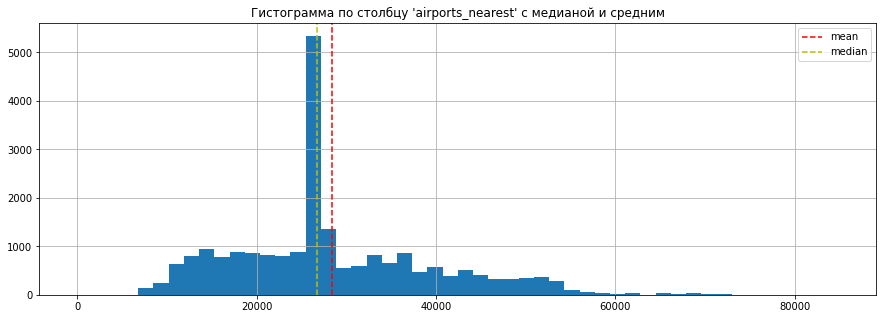

In [63]:
print('Среднее:')
display(df['airports_nearest'].mean())
print('Медиана:')
display(df['airports_nearest'].median())


plt.figure(figsize = (15,5))

ax = df['airports_nearest'].hist(bins = 50)

ax.axvline(x = df['airports_nearest'].mean(), color = 'r', linestyle = 'dashed', label = 'mean')
ax.axvline(x = df['airports_nearest'].median(), color = 'y', linestyle = 'dashed', label = 'median')
plt.legend()
plt.title("Гистограмма по столбцу 'airports_nearest' с медианой и средним")
plt.show()

Распределение `'airports_nearest'` похоже на широкое распределение Пуассона с сильным пиком - `медианой 26726.0`.

Среднее:


163.97425893537826

Медиана:


-1.0

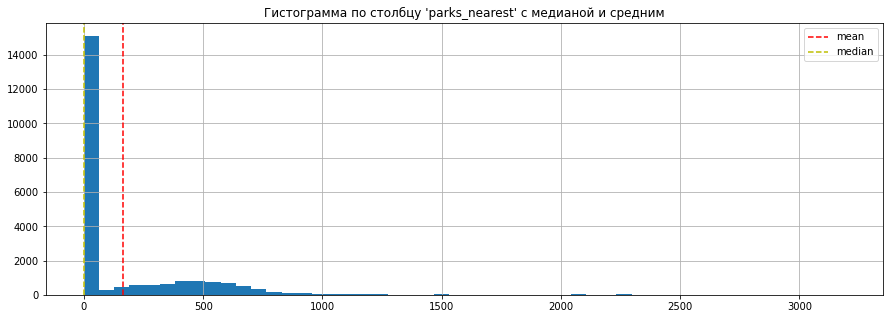

In [64]:
print('Среднее:')
display(df['parks_nearest'].mean())
print('Медиана:')
display(df['parks_nearest'].median())


plt.figure(figsize = (15,5))

ax = df['parks_nearest'].hist(bins = 50)

ax.axvline(x = df['parks_nearest'].mean(), color = 'r', linestyle = 'dashed', label = 'mean')
ax.axvline(x = df['parks_nearest'].median(), color = 'y', linestyle = 'dashed', label = 'median')
plt.legend()
plt.title("Гистограмма по столбцу 'parks_nearest' с медианой и средним")
plt.show()

Распределение `'parks_nearest'` похоже на распределение Пуассона, скошенное вправо, с сильным пиком - у нуля, что означает, что почти у 14000 объектов парков рядом нет.

Среднее:


2.575676039284273

Медиана:


3.0

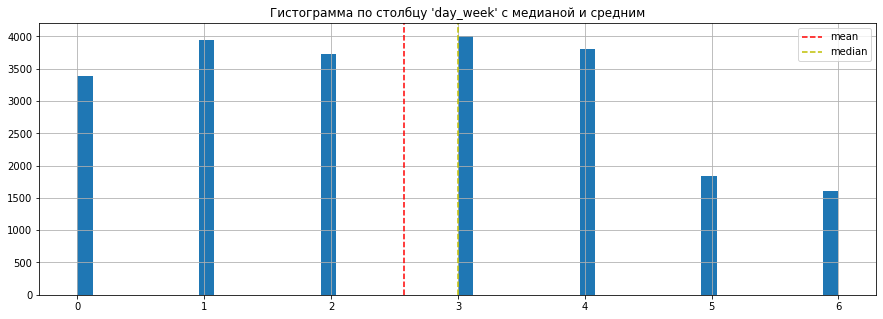

In [65]:
print('Среднее:')
display(df['day_week'].mean())
print('Медиана:')
display(df['day_week'].median())


plt.figure(figsize = (15,5))

ax = df['day_week'].hist(bins = 50)

ax.axvline(x = df['day_week'].mean(), color = 'r', linestyle = 'dashed', label = 'mean')
ax.axvline(x = df['day_week'].median(), color = 'y', linestyle = 'dashed', label = 'median')
plt.legend()
plt.title("Гистограмма по столбцу 'day_week' с медианой и средним")
plt.show()


Распределение `'day_week'` похоже на распределение Пуассона с максимумами: 1 и 3 дни недели.

Среднее:


6.4007354589891925

Медиана:


6.0

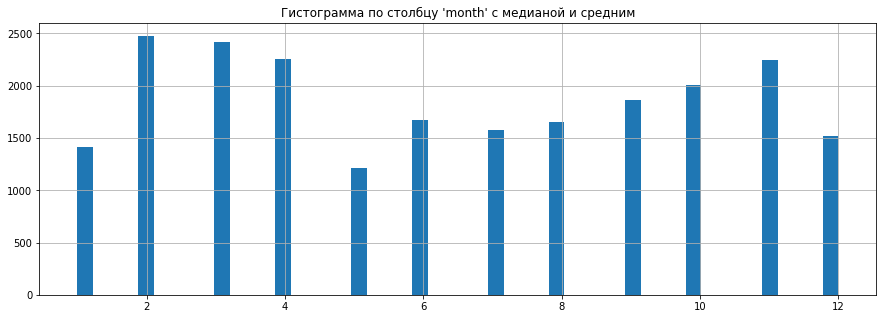

In [66]:
print('Среднее:')
display(df['month'].mean())
print('Медиана:')
display(df['month'].median())


plt.figure(figsize = (15,5))

ax = df['month'].hist(bins = 50)

#ax.axvline(x = df['month'].mean(), color = 'r', linestyle = 'dashed', label = 'mean')
#ax.axvline(x = df['month'].median(), color = 'y', linestyle = 'dashed', label = 'median')
plt.title("Гистограмма по столбцу 'month' с медианой и средним")
plt.show()

У гистограммы `'month'` имеется два пика: 2 и 3 месяцы. Минимумы: 1 и 5 месяцы.

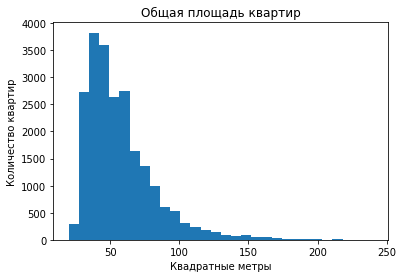

Наибольшие по площади варианты:
4559     240.00
19964    238.26
6107     236.00
2127     234.00
23281    231.20
7399     230.00
15785    222.00
16930    220.00
21831    220.00
9736     215.20
Name: total_area, dtype: float64


In [67]:
plt.hist(df['total_area'], bins=30)
plt.title('Общая площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади варианты:')
print(df['total_area'].sort_values(ascending=False).head(10))

Среднее:


170.86215448204598

Медиана:


93.0

Рассмотрим числовое описание данных
count    19355.000000
mean       170.862154
std        197.045347
min          3.000000
25%         44.000000
50%         93.000000
75%        223.000000
max       1099.000000
Name: days_exposition, dtype: float64

Значения ниже 25% можно считать быстрыми продажами, это значение соотв-т 44 дням.

Значения выше 75% можно считать долгими продажами, это значение соотв-т 223 дням.


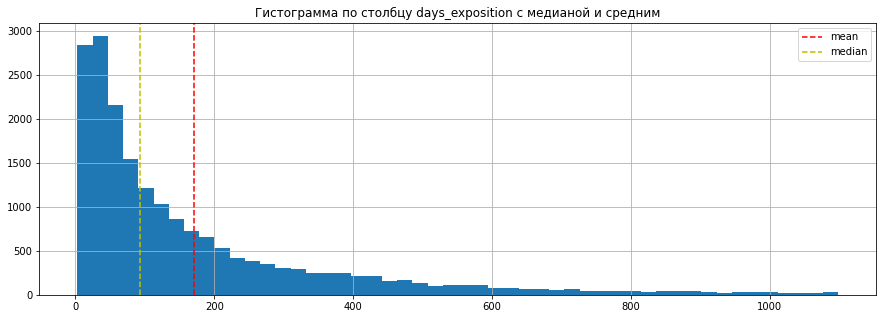

[ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20.
 21. 22.]
Датафрейм первых 20 минимальных дней размещения:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,property_class,price_square_m,day_week,month,year,type_floor,cityCenters_nearest_km
5240,5,4500000,36.00,2018-11-16,1,2.50,12,21.20,8,NaN,False,False,7.2,-1,Санкт-Петербург,43879,10602,2.0,279,1.0,776,3.0,эконом,125000,4,11,2018,другой,11
12461,6,3000000,29.30,2018-07-15,1,2.60,5,14.50,3,NaN,False,False,7.2,-1,Санкт-Петербург,41005,13508,0.0,-1,0.0,-1,3.0,эконом,102389,6,7,2018,другой,14
7273,16,5600000,57.00,2018-10-26,2,2.70,18,35.00,2,NaN,False,False,10.0,1,посёлок Парголово,53511,19687,0.0,-1,0.0,-1,3.0,комфорт,98246,4,10,2018,другой,20
9615,10,2700000,36.00,2019-03-29,1,2.50,5,17.00,2,NaN,False,False,8.0,2,Гатчина,26726,15063,NaN,-1,NaN,-1,3.0,эконом,75000,4,3,2019,другой,15
18654,13,3950000,39.00,2018-01-12,1,2.75,14,16.00,11,NaN,False,False,12.0,2,Санкт-Петербург,50737,15776,1.0,183,0.0,-1,3.0,эконом,101282,4,1,2018,другой,16
9778,50,11000000,87.00,2017-10-25,2,2.70,25,32.50,11,NaN,False,False,31.0,5,Санкт-Петербург,9586,11649,0.0,-1,0.0,-1,3.0,комфорт,126437,2,10,2017,другой,12
22887,12,3100000,36.00,2018-03-23,1,2.60,5,20.00,3,NaN,False,False,8.0,-1,Шлиссельбург,26726,15063,NaN,-1,NaN,-1,3.0,эконом,86111,4,3,2018,другой,15
22106,2,3577388,28.86,2017-06-29,1,2.75,14,18.28,9,NaN,False,False,NaN,0,Санкт-Петербург,18039,4352,0.0,-1,0.0,-1,3.0,эконом,123957,3,6,2017,другой,4
3308,9,4700000,42.00,2018-09-04,1,2.70,17,18.00,8,NaN,False,False,10.0,-1,Санкт-Петербург,16441,15443,1.0,458,1.0,1031,3.0,комфорт,111905,1,9,2018,другой,15
12333,0,10000000,80.00,2017-01-21,3,2.70,5,42.70,2,NaN,False,False,9.0,0,Санкт-Петербург,22506,2048,0.0,-1,2.0,569,3.0,комфорт,125000,5,1,2017,другой,2


Кол-во дней размещения объявления, отсортированные от больших к меньшим:


array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.,
       16., 17., 18., 19., 20., 21., 22.])

In [68]:
print('Среднее:')
display(df['days_exposition'].mean())
print('Медиана:')
display(df['days_exposition'].median())
print('Рассмотрим числовое описание данных')
print(df['days_exposition'].describe());
print('\nЗначения ниже 25% можно считать быстрыми продажами, это значение соотв-т 44 дням.')
print('\nЗначения выше 75% можно считать долгими продажами, это значение соотв-т 223 дням.')

plt.figure(figsize = (15,5))

ax = df['days_exposition'].hist(bins = 50)

ax.axvline(x = df['days_exposition'].mean(), color = 'r', linestyle = 'dashed', label = 'mean')
ax.axvline(x = df['days_exposition'].median(), color = 'y', linestyle = 'dashed', label = 'median')
plt.legend()
plt.title('Гистограмма по столбцу days_exposition с медианой и средним')
plt.show()


print(df['days_exposition'].sort_values(ascending=True).unique()[:20])
too_many_days_exp = df.sort_values(by='days_exposition', ascending=True)

print('Датафрейм первых 20 минимальных дней размещения:')
display(too_many_days_exp.head(10))

print('Кол-во дней размещения объявления, отсортированные от больших к меньшим:')
display(df['days_exposition'].sort_values(ascending=True).unique()[:20])

**Вывод:** Обычно продажа занимает 94 дня. Значения ниже 25% можно считать быстрыми продажами, это значение соотв-т 44 дням. Значения выше 75% можно считать долгими продажами, это значение соотв-т 223 дня.

### Изучим, какие факторы больше всего влияют на общую (полную) стоимость объекта.

Для этого рассчитаем коэфф-ты корреляции для каждой целевой переменной, построим графики, предварительно сгруппировав по целевой переменной, рассчитав среднее.

Рассчитаем коэфф-т корреляции между ценой и общей площадью
0.729660434386094
Рассчитаем коэфф-т корреляции между ценой и жилой площадью
0.623237375783574
Рассчитаем коэфф-т корреляции между ценой и площадью кухни
0.5417826824095745
Рассчитаем коэфф-т корреляции между ценой и количеством комнат
0.42984192116961767
Рассчитаем коэфф-т корреляции между ценой и днем недели
-0.00853543063972811
Рассчитаем коэфф-т корреляции между ценой и месяцем
-0.00853543063972811
Рассчитаем коэфф-т корреляции между ценой и годом
-0.022073239710607758


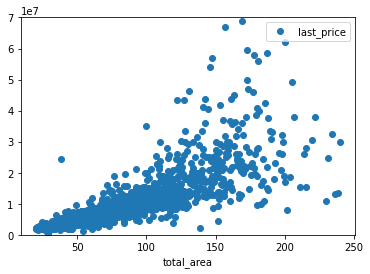

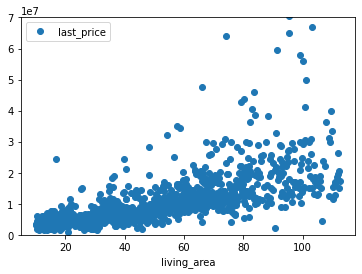

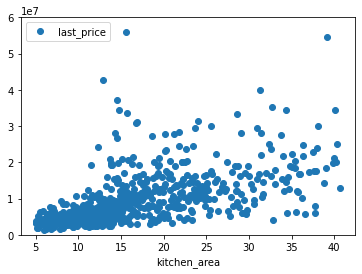

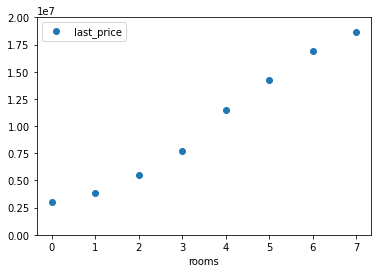

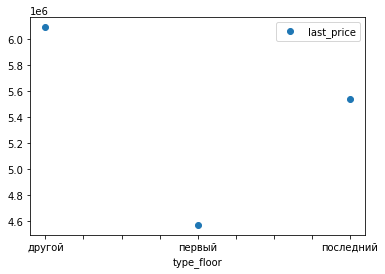

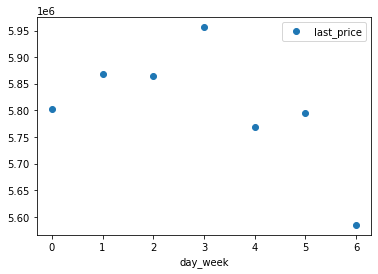

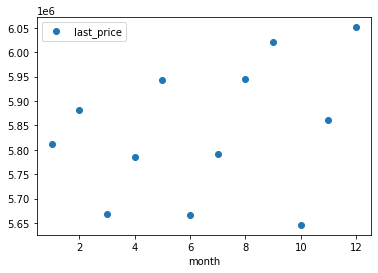

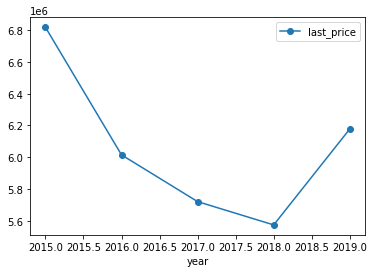

In [69]:
df_for_year = df.query('year > 2014')

print('Рассчитаем коэфф-т корреляции между ценой и общей площадью')
print(df['last_price'].corr(df['total_area']))
print('Рассчитаем коэфф-т корреляции между ценой и жилой площадью')
print(df['last_price'].corr(df['living_area']))
print('Рассчитаем коэфф-т корреляции между ценой и площадью кухни')
print(df['last_price'].corr(df['kitchen_area']))
print('Рассчитаем коэфф-т корреляции между ценой и количеством комнат')
print(df['last_price'].corr(df['rooms']))
print('Рассчитаем коэфф-т корреляции между ценой и днем недели')
print(df['last_price'].corr(df['day_week']))
print('Рассчитаем коэфф-т корреляции между ценой и месяцем')
print(df['last_price'].corr(df['day_week']))
print('Рассчитаем коэфф-т корреляции между ценой и годом')
print(df_for_year['last_price'].corr(df['year']));
list_to_compare = df.pivot_table(index='last_price', values=['total_area', 'living_area', 'kitchen_area', 'rooms', 'type_floor', 'day_week', 'month', 'year'], aggfunc='mean')

df.pivot_table(index='total_area', values='last_price', aggfunc='mean').plot(style='o', ylim=(0, 70000000))
df.pivot_table(index='living_area', values='last_price', aggfunc='mean').plot(style='o', ylim=(0, 70000000))
df.pivot_table(index='kitchen_area', values='last_price', aggfunc='mean').plot(style='o', ylim=(0, 60000000))
df.pivot_table(index='rooms', values='last_price', aggfunc='mean').plot(style='o', ylim=(0, 20000000))
df.pivot_table(index='type_floor', values='last_price', aggfunc='mean').plot(style='o')
df.pivot_table(index='day_week', values='last_price', aggfunc='mean').plot(style='o')
df.pivot_table(index='month', values='last_price', aggfunc='mean').plot(style='o')
df_for_year.pivot_table(index='year', values='last_price', aggfunc='mean').plot(style='o-');




***Вывод***

Для столбцов: 'total_area', 'living_area', 'kitchen_area', 'rooms' заметная некоторая положительная корреляция. В зависимости от роста целевой переменной - растет и стоимость квартир.

Корреляции нет у 'day_week', 'month' и 'year'. В случае 'year', если ну учитывать 2014 г. и рассотреть рассчитанный коэф. корреляции -0.02, который находится в диапазоне от -0,1 до +0,1, то можно сделать вывод, что у этих целевых переменных нет линейной зависимости.

Для столбца типы этажей 'type_floor': первый этаж занимает самую минимальную стоимость, последний этаж самый дорогой, а другие этажи занимают промежуточное положение и их значение "прижато" к значению последнего этажа.

Для столбца 'day_week' выгодными днями для покупки являются: 0, 1, 4 и 6, дни недели.

Для столбца 'month' выгодными месяцами для покупки являются: 2, 3, 6, 8, 10 и 11.




### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

Для расчета среднего квадратного метра для начала необходимо отобрать необходимые строки датафрейма.
Для этого:
1) Сначала получим список населённых пунктах с наибольшим числом объявлений;

2) Используем метод .isin() и получим список булевых значений (подсвеченные необходимые строки) по именам населённых пунктов, найденных на предыдущем шаге;

3) Создадим новый датафрейм с отфильтрованными строками, используя булев список (флаги);

4) И найдем среднюю цену кв.м. отн-о населённых пунктов методом .groupby(), сгруппировав по 'locality_name' и выделив столбец 'price_square_m'. 

In [70]:
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,property_class,price_square_m,day_week,month,year,type_floor,cityCenters_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,False,False,25.0,-1,Санкт-Петербург,18863,16028,1.0,482,2.0,755,NaN,бизнес-класс,120370,3,3,2019,другой,16
1,7,3350000,40.4,2018-12-04,1,2.55,11,18.6,1,NaN,False,False,11.0,2,посёлок Шушары,12817,18603,0.0,-1,0.0,-1,81.0,эконом,82921,1,12,2018,первый,19
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,NaN,False,False,8.3,0,Санкт-Петербург,21741,13933,1.0,90,2.0,574,558.0,комфорт,92786,3,8,2015,другой,14
3,0,64900000,159.0,2015-07-24,3,3.00,14,NaN,9,NaN,False,False,NaN,0,Санкт-Петербург,28098,6800,2.0,84,3.0,234,424.0,бизнес-класс,408176,4,7,2015,другой,7
5,10,2890000,30.4,2018-09-10,1,2.55,12,14.4,5,NaN,False,False,9.1,-1,посёлок городского типа Янино-1,26726,15063,NaN,-1,NaN,-1,55.0,эконом,95066,0,9,2018,другой,15


Отфильтрованный датафрейм по 10 населённых пунктах с наибольшим числом объявлений:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,property_class,price_square_m,day_week,month,year,type_floor,cityCenters_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,False,False,25.0,-1,Санкт-Петербург,18863,16028,1.0,482,2.0,755,NaN,бизнес-класс,120370,3,3,2019,другой,16
1,7,3350000,40.4,2018-12-04,1,2.55,11,18.6,1,NaN,False,False,11.0,2,посёлок Шушары,12817,18603,0.0,-1,0.0,-1,81.0,эконом,82921,1,12,2018,первый,19
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,NaN,False,False,8.3,0,Санкт-Петербург,21741,13933,1.0,90,2.0,574,558.0,комфорт,92786,3,8,2015,другой,14
3,0,64900000,159.0,2015-07-24,3,3.00,14,NaN,9,NaN,False,False,NaN,0,Санкт-Петербург,28098,6800,2.0,84,3.0,234,424.0,бизнес-класс,408176,4,7,2015,другой,7
6,6,3700000,37.3,2017-11-02,1,2.55,26,10.6,6,NaN,False,False,14.4,1,посёлок Парголово,52996,19143,0.0,-1,0.0,-1,155.0,эконом,99196,3,11,2017,другой,19


Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:


locality_name
Санкт-Петербург      111983
Пушкин               102465
деревня Кудрово       92239
посёлок Парголово     89920
посёлок Мурино        85415
посёлок Шушары        78463
Колпино               75358
Гатчина               68852
Всеволожск            68442
Выборг                58590
Name: price_square_m, dtype: int64

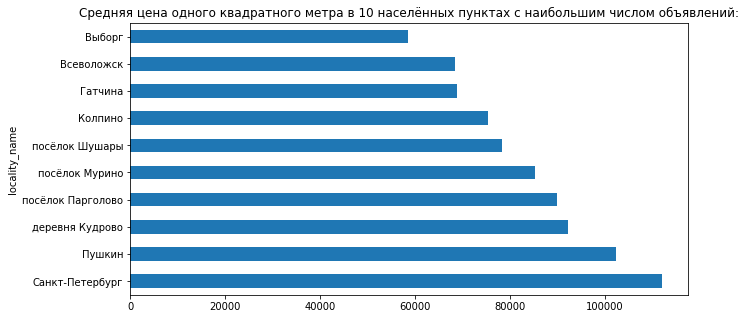

In [71]:
#display(df.groupby('locality_name').count().nlargest(10, ['last_price']))

cities_ten = pd.DataFrame({'name': ['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск', 'Пушкин',
                                    'Колпино', 'посёлок Парголово', 'Гатчина', 'деревня Кудрово', 'Выборг'],
                           'price_square_m_city': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]})

rows = df['locality_name'].isin(cities_ten['name'])
filtred_df = df.loc[rows]
print('Отфильтрованный датафрейм по 10 населённых пунктах с наибольшим числом объявлений:')
display(filtred_df.head())

price_square_m_city = round(filtred_df.groupby('locality_name')['price_square_m']
                            .mean()).astype(int).sort_values(ascending=False)
print('Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:')
display(price_square_m_city);
price_square_m_city.plot(kind='barh', title = 'Средняя цена одного квадратного метра в 10 населённых пунктах \
с наибольшим числом объявлений:', figsize = (10,5));


**Вывод**

Населенные пункты с самыми дорогими кв.м.: `Санкт-Петербург - 114849 руб и Пушкин - 103126 руб.`

Населенные пункты с самыми дешевыми кв.м.: `Выборг - 58142 руб и Всеволожск - 68654 руб`.


### Выделим квартиры в Санкт-Петербурге с помощью столбца 'locality_name' и вычислим среднюю цену каждого километра

Отфильтрованный датафрейм по значению 'locality_name' равному 'Санкт-Петербург':


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,property_class,price_square_m,day_week,month,year,type_floor,cityCenters_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,NaN,False,False,25.0,-1,Санкт-Петербург,18863,16028,1.0,482,2.0,755,NaN,бизнес-класс,120370,3,3,2019,другой,16
2,10,5196000,56.0,2015-08-20,2,2.7,5,34.3,4,NaN,False,False,8.3,0,Санкт-Петербург,21741,13933,1.0,90,2.0,574,558.0,комфорт,92786,3,8,2015,другой,14
3,0,64900000,159.0,2015-07-24,3,3.0,14,NaN,9,NaN,False,False,NaN,0,Санкт-Петербург,28098,6800,2.0,84,3.0,234,424.0,бизнес-класс,408176,4,7,2015,другой,7
7,5,7915000,71.6,2019-04-18,2,2.7,24,NaN,22,NaN,False,False,18.9,2,Санкт-Петербург,23982,11634,0.0,-1,0.0,-1,NaN,комфорт,110545,3,4,2019,другой,12
9,18,5400000,61.0,2017-02-26,3,2.5,9,43.6,7,NaN,False,False,6.5,2,Санкт-Петербург,50898,15008,0.0,-1,0.0,-1,289.0,комфорт,88525,6,2,2017,другой,15


График цены 'last_price' от каждого км 'cityCenters_nearest_km' от центра города 

Рассчитаем коэфф-т корреляции между ценой и км от центра города
-0.3669982038303143


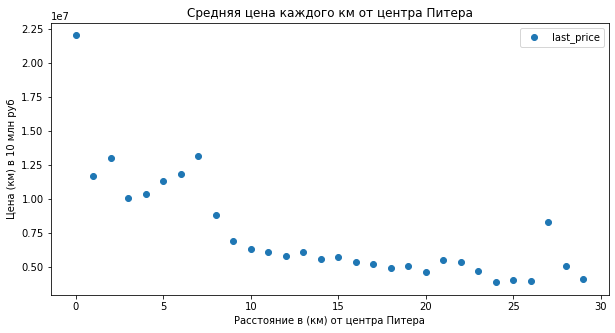

In [72]:
#делаем срез данных по Питерским квартирам. Создаем датасет filtred_df_2 только с Питерскими квартирами.
rows = df['locality_name'].isin(['Санкт-Петербург'])
filtred_df_2 = df.loc[rows]

print("Отфильтрованный датафрейм по значению 'locality_name' равному 'Санкт-Петербург':")
display(filtred_df_2.head())

#сгруппируем 'last_price' по 'cityCenters_nearest_km' и построим график
print("График цены 'last_price' от каждого км 'cityCenters_nearest_km' от центра города ")
filtred_df_2.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='mean')\
            .plot(title = 'Средняя цена каждого км от центра Питера', figsize = (10,5), style='o')
plt.xlabel('Расстояние в (км) от центра Питера')
plt.ylabel('Цена (км) в 10 млн руб')


print('\nРассчитаем коэфф-т корреляции между ценой и км от центра города')
print(filtred_df_2['last_price'].corr(df['cityCenters_nearest_km']))

**Вывод**

Отчетлива видная отрицательная тендеция цены недвижимости при росте расстояния (км) от центра города.

Наблюдается резкий рост при приближении к значению '0', т.е. центру города. Чем дальше от центра города, тем более цена стремится к горизонтальной линии, т.е. как таковой корреляции от значения 15 км от центра города практически нет. Если не учитывать некоторые выборсы после 40 км и 55 км.

### Общий вывод

Итак, было проведено обширное исследование недвижимости в г. Санкт-Петербург и ЛО.

Был проведен первичный анализ данных: из каких столбцов состоит датафрейм, какие столбцы числовые, булевые и текстовые. Были заполнены пропущенные значения медианами. Изменены типы данных столбцов, где это требовалось для расчетов. Далее построены гистограммы и оценены - каким зависимостям подчиняются числовые столбцы.

Для 'ceiling_height', 'airports_nearest', 'cityCenters_nearest', 'days_exposition', 'kitchen_area', 'living_area', 'floors_total' пропуски были заполнены медианными значениями, для 'parks_nearest', 'ponds_nearest', 'balcony' пропуски были заполнены нулями.

Также были построены гистограммы для каждого числового столбца и описаны типы зависимости. В основном это распределения Пуассона с пиками около 0.

Были приведены к единообразию названия одних и тех же населенных пунктов. Устранены дубликаты, в 'locality_name', добавлены столбцы: 'per_square_meter', 'day_week', 'month', 'year', 'type_floor', cityCenters_nearest_km. 

Кол-во балконов (balcony), этажей (floors_total), дней размещения (days_exposition) last_price, airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest приведены к типу 'int'. Устранены аномально большие значения высоты потолков 'ceiling_height'. В столбце 'rooms' замечены строки с нулевыми значениями, что является квартирами студиями. Минимальное значение суммарной площади 'total_area' начинается с 15.5 кв.м., а заканчивается на значении 371 кв.м. В столбце 'living_area' были обнаружены площади в 2, 3, 5, 5.4, 6, 6.5, 8 кв.м.

Построили гистограмму по столбцу 'days_exposition' с медианой и средним. Получен вывод: обычно продажа занимает 100 дней. Быстрыми продажами можно считать продажи до 50 дней. Необычно долгими можно считать продажи более 800 дней.

Для столбцов: 'total_area', 'living_area', 'kitchen_area', 'rooms' обнаружена положительная корреляция. Корреляции нет у 'day_week' и 'month'. А также присутствует достаточно удивительная отрицательная корреляция стоимости квартир от года 'year'. Но есть некоторый отскок роста стоимости от 2018 к 2019 году.

Для столбца типы этажей 'type_floor': первый этаж занимает самую минимальную стоимость, последний этаж самый дорогой, а другие этажи занимают промежуточное положение и их значение "прижато" к значению последнего этажа.

Для столбца 'day_week' выгодными днями для покупки являются: 0, 1, 4 и 6, дни недели.

Для столбца 'month' выгодными месяцами для покупки являются: 2, 3, 6, 8, 10 и 11.

Также была посчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

Населенные пункты с самыми дорогими кв.м.: Санкт-Петербург - 114849 руб и Пушкин - 103126 руб.

Населенные пункты с самыми дешевыми кв.м.: Выборг - 58142 руб и Всеволожск - 68654 руб.

Вычислена средняя цена каждого километра в Санкт-Петерубрге: Отчетлива видная отрицательная тендеция цены недвижимости при росте расстояния (км) от центра города.

Наблюдается резкий рост при приближении к значению '0', т.е. центру города. Чем дальше от центра города, тем более цена стремится к горизонтальной линии, т.е. как таковой корреляции от значения 15 км от центра города практически нет. Если не учитывать некоторые выбросы после 40 км и 55 км.